# **Lab Task: Build K‑Nearest Neighbors (KNN) Classifier from Scratch**

## **Objective :**
- Implement the KNN classification algorithm in Python without using scikit‑learn’s KNeighborsClassifier.

- Practice data loading, cleaning, feature scaling, and train/test splitting.

- Evaluate your classifier’s performance using accuracy, precision, recall, and a confusion matrix.

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## **1. Data loading**


In [67]:
# Load the dataset
df = pd.read_csv("/dataset.csv", index_col='id').reset_index(drop=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## **2. Data Preprocessing**
In this step, you should analyze yourself which preprocessing steps need to be done and apply all that are needed for the dataset.
For example:
- **Identify missing values and handling them appropriately**
- **Feature scaling where needed**
- **Train/Test split**: Split into 70% train / 30% test (use random_state=42).

In [68]:
#df.isnull().sum()
df.fillna(df.mean(numeric_only=True), inplace=True)
print("Missing values per column:\n",df.isnull().sum())

le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Missing values per column:
 diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
X_train shape: (398, 30)
X_test shape: (171, 30)
y_train sha

## **Implement KNN Class**

In [69]:
class kNN():
    # init function
    def __init__(self, k=3, metric='euclidean', p=None):
        self.k = k
        self.metric = metric
        self.p = p

    # euclidean distance (l2 norm)
    def euclidean(self, v1, v2):
      return np.sqrt(np.sum((v1-v2)**2))

    # manhattan distance (l1 norm)
    def manhattan(self, v1, v2):
      return np.sum(np.abs(v1-v2))

    # To store train set
    def fit(self, X_train, y_train):
      self.X_train = X_train
      self.y_train = y_train

    def predict(self, X_test):
      # Loop over rows in test set
      predictions = []
      for i in X_test.values:
        neighbors = self.get_neighbours(i)
        prediction = max(set(neighbors), key=neighbors.count)
        predictions.append(prediction)
      return predictions

    def get_neighbours(self, test_row):
      distances = [self.manhattan(test_row, train_row) for train_row in self.X_train.values]
      k_indices = np.argsort(distances)[:self.k]
      neighbors = [self.y_train.iloc[i] for i in k_indices]
      return neighbors

## **Evaluate the model**


Fine the following performance matrices results:
- Accuracy (overall correct rate)

- Precision (true positives ÷ predicted positives)

- Recall (true positives ÷ actual positives)

- Confusion Matrix

- Classfication Report

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Create and train the KNN model
knn_model = kNN(k=5)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9707602339181286
Precision: 0.9707325431068053
Recall: 0.9707602339181286
Confusion Matrix:
 [[106   2]
 [  3  60]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



## **Effect of k on Classification Accuracy**

- For each k from 3 to 27, fit your k‑NN on the training set and record test accuracy.

- Plot k (on the x‑axis) vs. accuracy (on the y‑axis), with markers and clear labels.

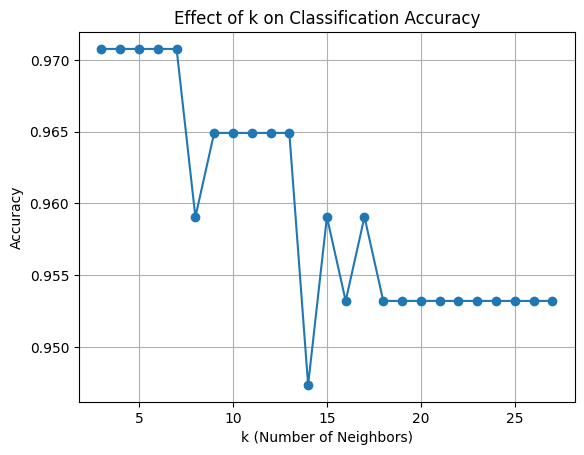


Best k: 3 with accuracy: 0.9708


In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

k_values = range(3, 28)
accuracies = []

for k in k_values:
    knn_model = kNN(k=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Effect of k on Classification Accuracy')
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracies)]
best_acc = max(accuracies)
print(f"\nBest k: {best_k} with accuracy: {best_acc:.4f}")